In [1]:
import pandas
import numpy

In [2]:
data1 = pandas.read_csv("STOCK1.csv")#apple
data2 = pandas.read_csv("STOCK2.csv")#disney

In [3]:
[(col,data1[col].dtype) for col in data1.columns]

[('Date', dtype('O')),
 ('Open', dtype('float64')),
 ('High', dtype('float64')),
 ('Low', dtype('float64')),
 ('Close', dtype('float64')),
 ('Adj Close', dtype('float64')),
 ('Volume', dtype('int64'))]

In [4]:
import datetime

data1["Date"] = [datetime.datetime.strptime(x,r'%Y-%m-%d').date() for x in data1["Date"]]
data2["Date"] = [datetime.datetime.strptime(x,r'%Y-%m-%d').date() for x in data2["Date"]]

In [5]:
(datetime.datetime.now().date()-data1["Date"][0]).days

7893

In [6]:
data_min = min(min(data1["Date"]),min(data2["Date"]))

In [7]:
data1["Date"] = data1["Date"].apply(lambda x: (x-data_min).days)
data2["Date"] = data2["Date"].apply(lambda x: (x-data_min).days)

In [8]:
for data in [data1,data2]:
    data["Day_profit"] = data["Close"] - data["Open"]

In [9]:
# function to visualize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


def show_data_2d(data, classes=None, name=None, additional=None):
    tsne = TSNE(n_components=2, init='pca', random_state=10086)  # dim-reducer

    if additional is not None:
        # addition points must be concatenated to data due to TSNE here is not a parameterized algorithm
        data_center = numpy.concatenate((data, additional), axis=0)
        data_center = tsne.fit_transform(data_center)
        data_tsne = data_center[:data.shape[0]]
        additional = data_center[data.shape[0]:]
    else:
        data_tsne = tsne.fit_transform(data)

    print(
        "t-SNE report: data dimension has been reduced from {} to {}.".format(
            data.shape[-1], data_tsne.shape[-1]))  # summary info

    # plot
    plt.figure(figsize=(6, 6))
    # data points
    for i in range(data_tsne.shape[0]):
        plt.plot(data_tsne[i, 0],
                 data_tsne[i, 1],
                 "o",
                 color="blue" if classes is None else plt.cm.Set1(classes[i]))
    # additional points
    if additional is not None:
        for i in range(additional.shape[0]):
            plt.plot(additional[i, 0],
                     additional[i, 1],
                     "+",
                     color="blue" if classes is None else plt.cm.Set1(i))
    # title
    if name is not None:
        plt.title(name)
    plt.tight_layout()
    plt.savefig(
        "figs/{}.png".format(name if name is not None else "fig"))  # save
    plt.show()

In [10]:
def show_datas(x,y,name=None,label=None):
    plt.figure(figsize=(20,8))
    try:
        for i,y_ in enumerate(y):
            plt.plot(x,y_,color=plt.cm.Set1(i),label=label[i],linewidth=1)
    except (TypeError, ValueError):
        plt.plot(x,y,color="blue",label = label,linewidth=1)
    if name is not None:
        plt.title(name)
    else:
        name = "fig"
    if label is not None:
        plt.legend(loc=0,ncol=2)
    plt.tight_layout()
    plt.savefig("figs/{}.png".format(name))
    plt.show()

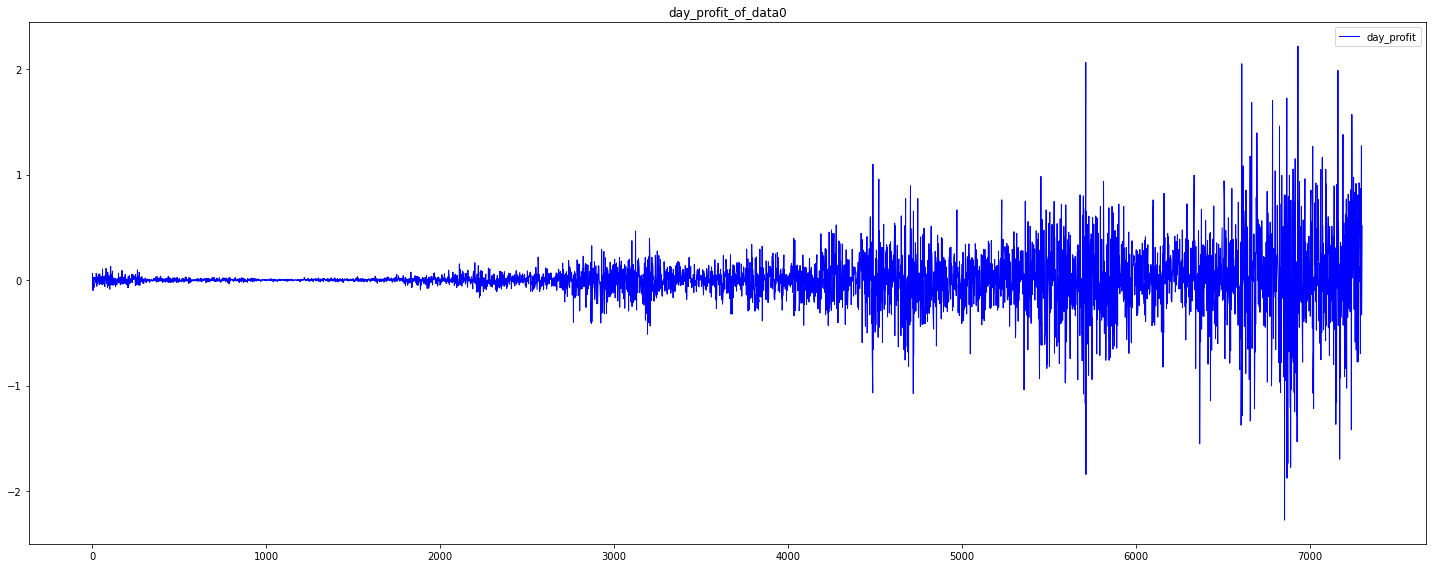

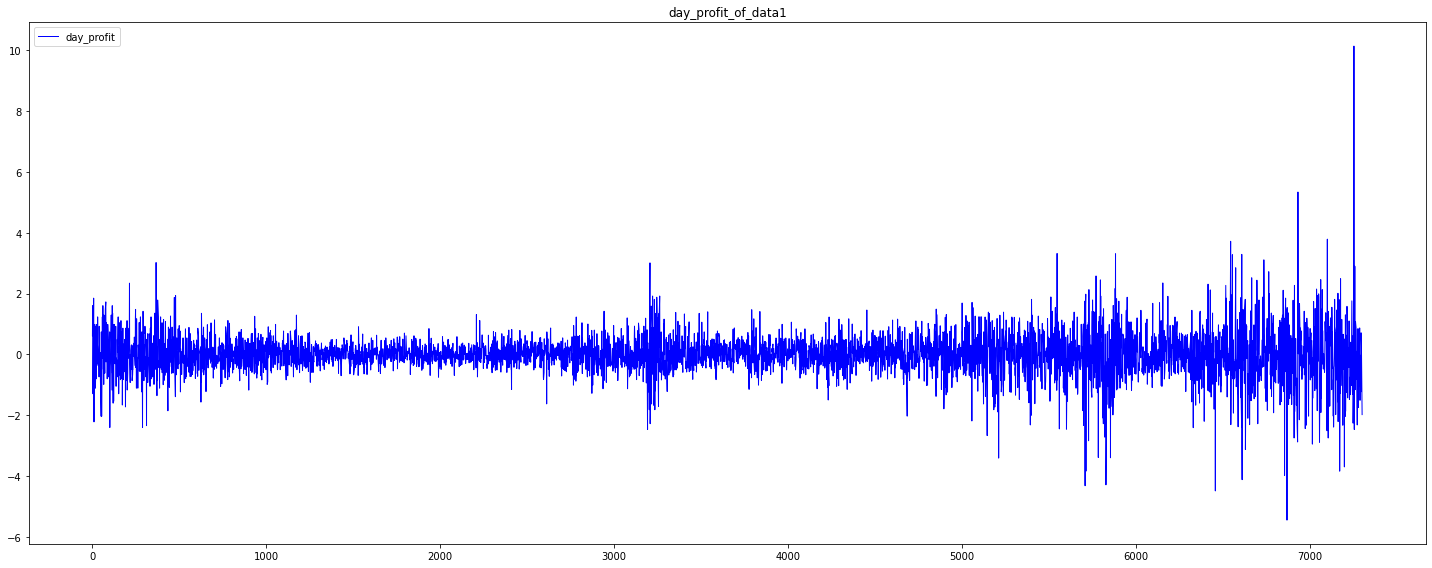

In [11]:
for i,data in enumerate([data1,data2]):
    show_datas(data["Date"],data["Day_profit"],name="day_profit_of_data{}".format(i),label = "day_profit")

t-SNE report: data dimension has been reduced from 8 to 2.


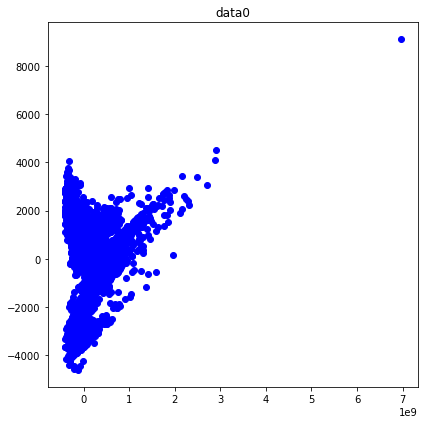

t-SNE report: data dimension has been reduced from 8 to 2.


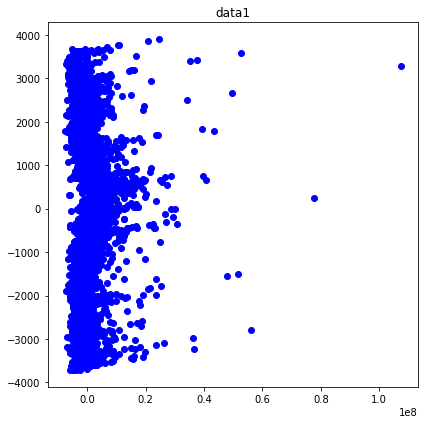

In [12]:
for i,data in enumerate([data1,data2]):
    show_data_2d(data.to_numpy(),name="data{}".format(i))

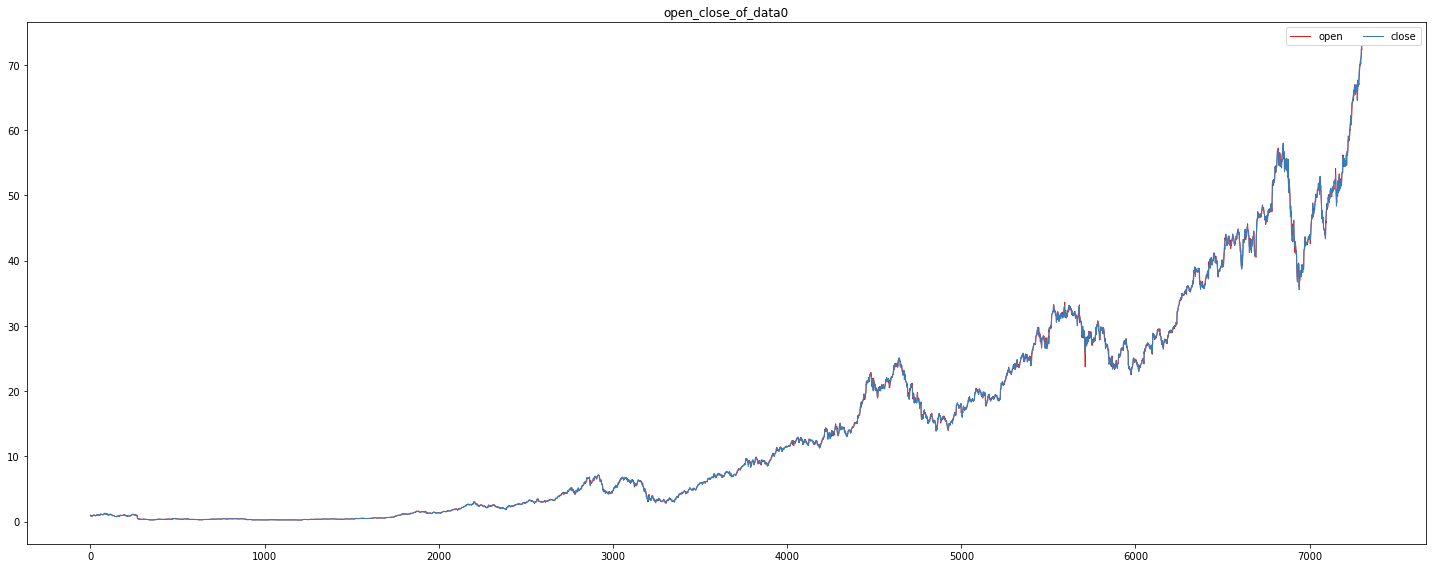

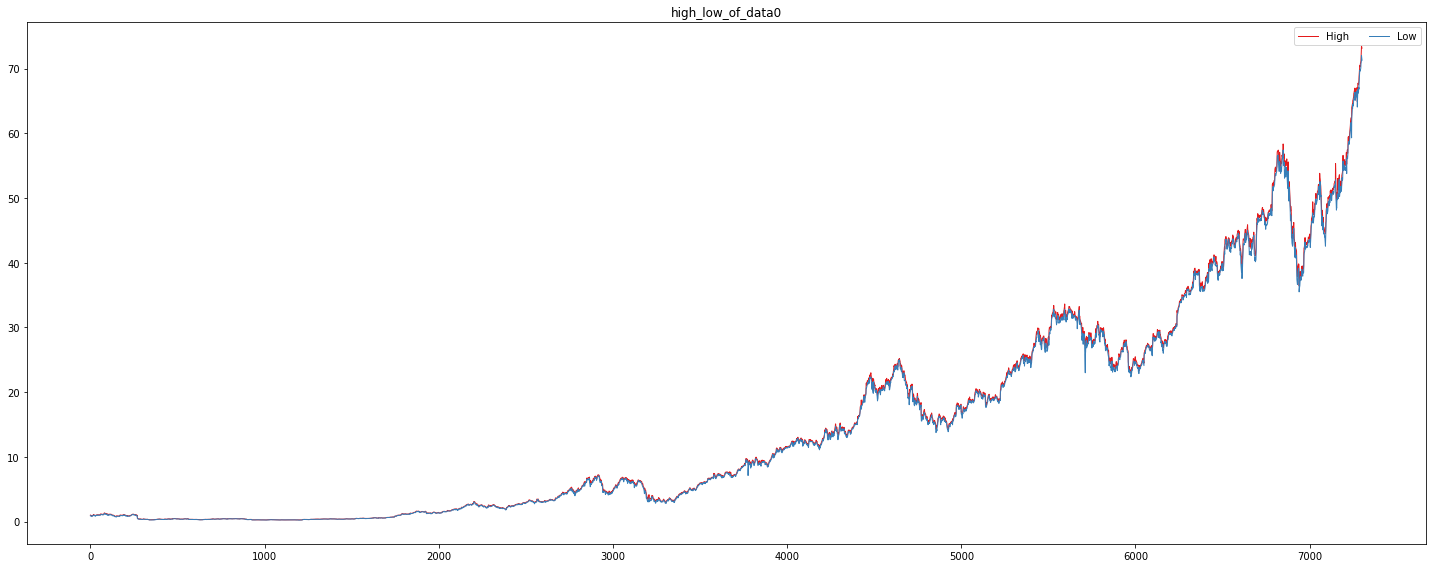

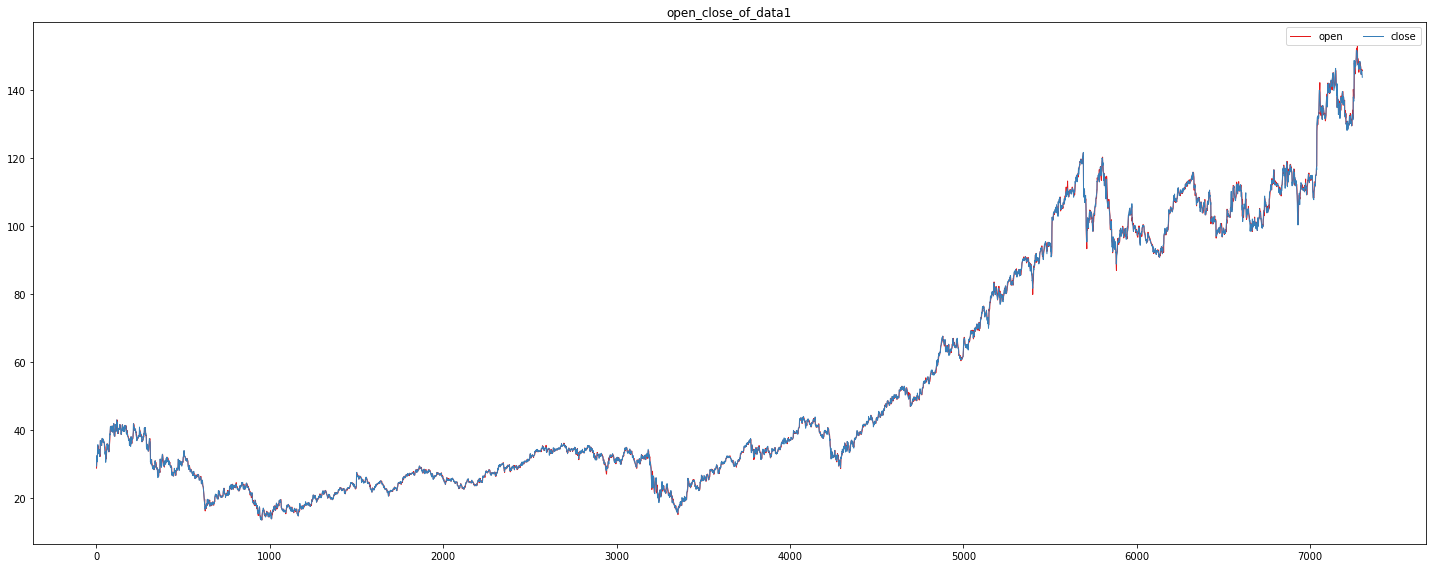

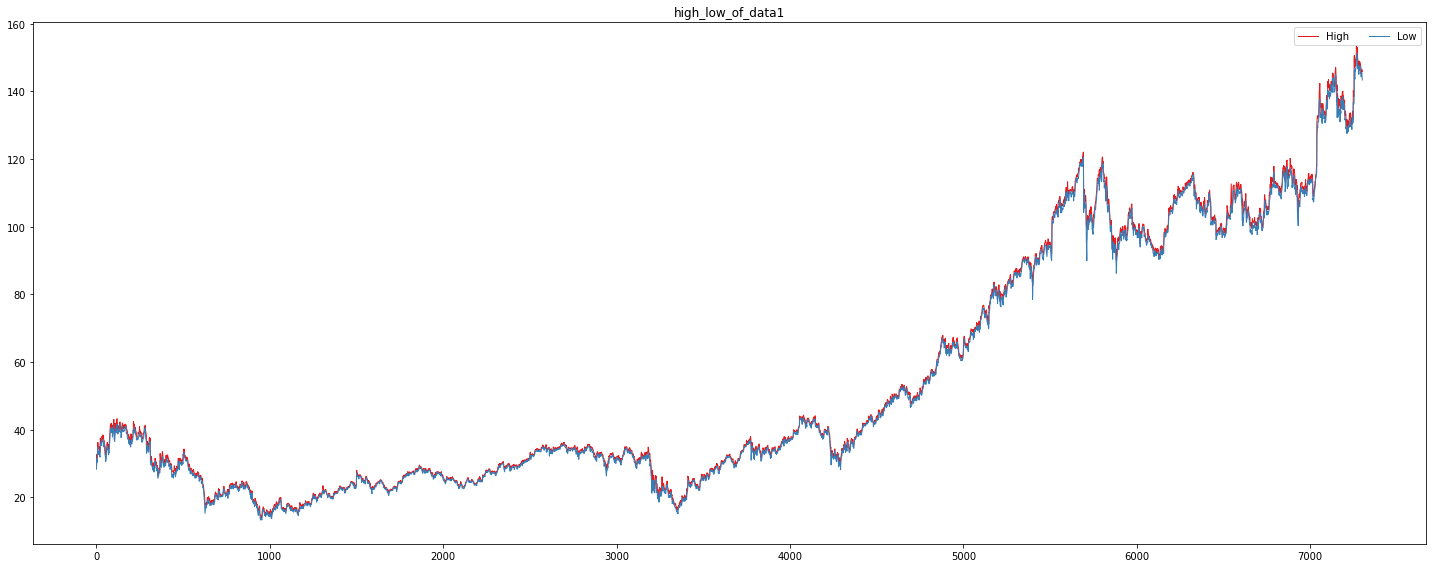

In [13]:
for i,data in enumerate([data1,data2]):
    show_datas(data["Date"],[data["Open"],data["Close"]],name="open_close_of_data{}".format(i),label = ["open","close"])
    show_datas(data["Date"],[data["High"],data["Low"]],name="high_low_of_data{}".format(i),label = ["High","Low"])

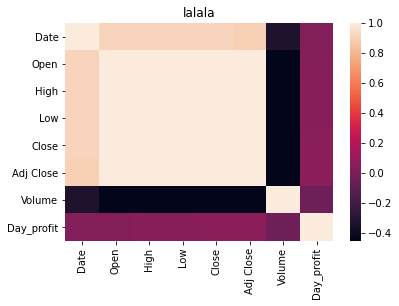

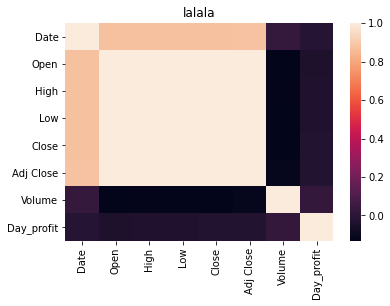

In [14]:
import seaborn
for i,data in enumerate([data1,data2]):
    ax = plt.axes()
    seaborn.heatmap(data.corr(),ax=ax)
    ax.get_figure().savefig("figs/corr_heatmap_of_data{}".format(i))
    ax.set_title('lalala')
    plt.show()
    

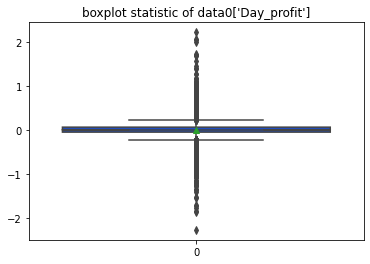

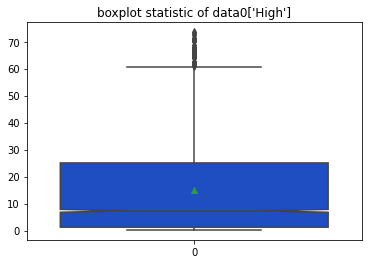

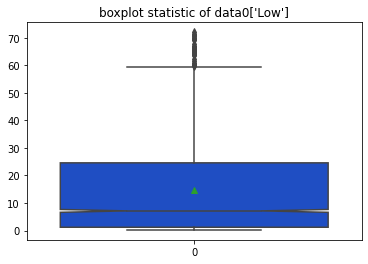

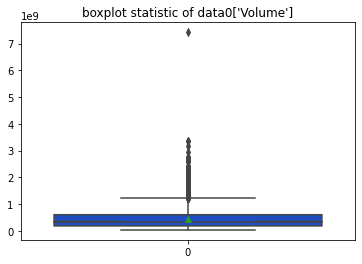

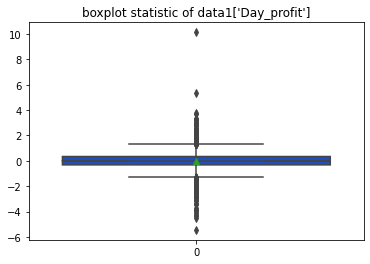

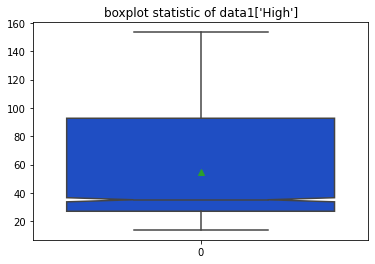

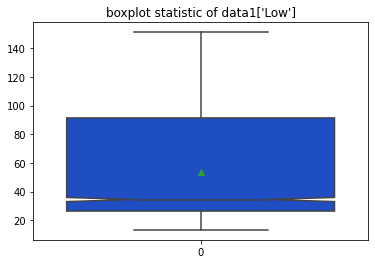

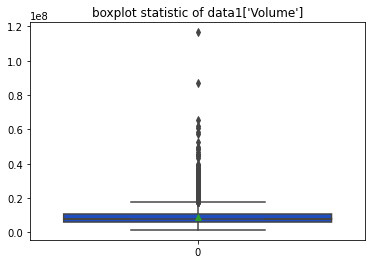

In [15]:
for i,data in enumerate([data1,data2]):
    for col in ["Day_profit","High","Low","Volume"]:
        fig = seaborn.boxplot(
            data=data[col],
            # x = None,
            # y = "Day_profit",
            palette=[seaborn.xkcd_rgb["blue"], seaborn.xkcd_rgb["green"],seaborn.xkcd_rgb["yellow"]], # the colors
            showmeans=True,
            notch = True
        )
        fig.set_title("boxplot statistic of data{}['{}']".format(i,col))
        fig.figure.savefig("figs/boxplot_data{}_{}".format(i,col)) # save
        plt.show() # show the plot

In [16]:
import math

# this function aims at plot a histogram of specified data, with a specified bin size
def histo(datas,interval,name,do_save):
    plt.figure(figsize=(4,4)) # fig size
    lim_right = (math.ceil(max(datas)/interval))*interval # x range
    lim_left = (math.floor(min(datas)/interval))*interval # x range
    hist = plt.hist(datas,bins = numpy.arange(lim_left,lim_right+interval/2,interval).tolist(),edgecolor="blue") # hist
    # annotate the pillars
    for i in range(len(hist[0])):
        plt.annotate(text=int(hist[0][i]), xy=(hist[1][i] + interval / 3, hist[0][i]))
    plt.title("histogram of {}, bin size {}".format(name,interval)) # title
    # save figs
    if do_save:
        plt.savefig("figs/histo_{}.png".format(name))
    plt.show()

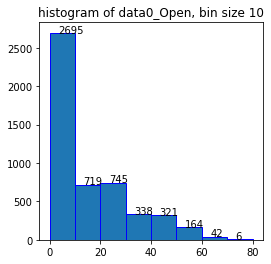

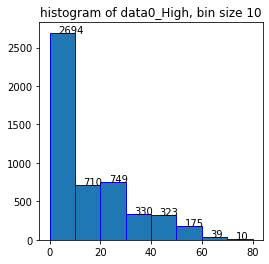

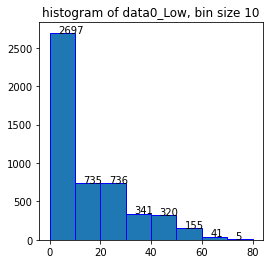

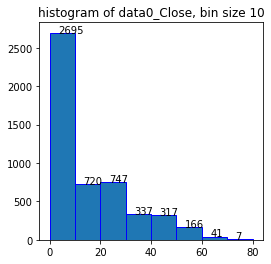

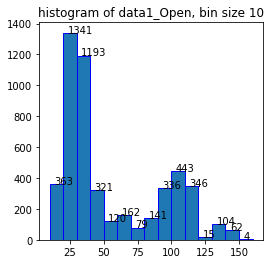

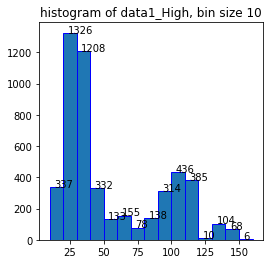

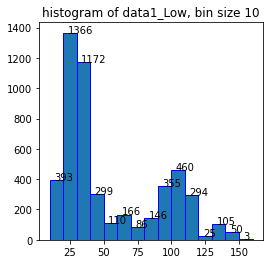

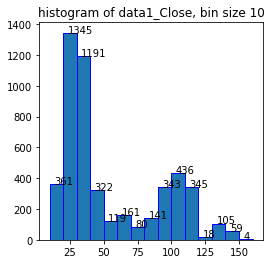

In [17]:
quantitative_cols = ["Open","High","Low","Close"] # the columns to be plotted
for i,data in enumerate([data1,data2]):
    for col in quantitative_cols:
        datas = data[col].values
        span = max(datas)-min(datas)
        interval = 20 if span >= 140 else 10 if span >=50 else 5 if span >= 20 else 2 if span >= 10 else 1 if span >= 5 else 0.5 if span >=2 else 0.2 # choose bin size
        histo(datas,interval,"data{}_{}".format(i,col),True)